<a href="https://colab.research.google.com/github/sqbitegh/Colabs/blob/main/DataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


def read_vectors(filepath: str, max_rows: int = None) -> List[List[float]]:
  """Reads a file containing newline-separated vectors and returns a list of vectors."""
  with open(filepath, 'r') as file:
      if max_rows is None:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line]
      else:
        return [[float(num) for num in line.split()] for line in file if line.strip() and 'end' not in line][:max_rows]
    #return [[float(num) for num in line.split()] for line in file if line.strip()]

def map_vectors(func: Callable[[List[float]], List[float]], vectors: List[List[float]]) -> List[List[float]]:
  """Applies a function to each vector in the list."""
  return list(map(func, vectors))

def filter_vectors(predicate: Callable[[List[float]], bool], vectors: List[List[float]]) -> List[List[float]]:
  """Filters the list of vectors based on a predicate."""
  return list(filter(predicate, vectors))

def sort_vectors_by_column(vectors: List[List[float]], column_index: int, reverse: bool = False) -> List[List[float]]:
  """Sorts the list of vectors by a specific column."""
  return sorted(vectors, key=lambda vector: vector[column_index], reverse=reverse)

def zip_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[Tuple[List[float], List[float]]]:
  """Zips two lists of vectors together."""
  return list(zip(vectors1, vectors2))

def concat_vectors(vectors1: List[List[float]], vectors2: List[List[float]]) -> List[List[float]]:
  """Concatenates two lists of vectors."""
  return list(concat([vectors1, vectors2]))

def cut_vectors(vectors: List[List[float]], start_index: int, end_index: int) -> List[List[float]]:
  """Cuts a list of vectors by index ranges."""
  return list(take(end_index, drop(start_index, vectors)))

def read_bool_vector(filepath: str) -> List[float]:
  """Reads a file containing newline-separated boolean strings (True/False)
  and converts them to a list of floats (1.0/0.0)."""
  with open(filepath, 'r') as file:
    return [1.0 if line.strip() == 'True' else 0.0 for line in file if 'end' not in line]

def add_dimension(vectors: List[List[float]], new_dimension: List[float]) -> List[List[float]]:
    """Adds a new dimension as the first element to each vector."""
    return [[new_val] + vec for new_val, vec in zip(new_dimension, vectors)]

def squeeze_columns(vectors: List[List[float]], c1: int, c2: int) -> List[List[float]]:
    """Squeezes columns from c1 to c2 (inclusive) into a single column by addition.
    Handles c1=0 correctly.
    """
    return list(map(lambda vector: ([sum(vector[c1:c2])] + vector[c2:]) if c1 == 0
                                  else (vector[:c1-1] + [sum(vector[c1-1:c2])] + vector[c2:]),
                   vectors))

def print_vector_info(vectors: List[List[float]]) -> None:
  """Prints the size and dimensions of the list of vectors."""
  num_vectors = len(vectors)
  if num_vectors > 0:
    vector_dim = len(vectors[0])
  else:
    vector_dim = 0  # Handle empty list case

  print(f"Number of vectors: {num_vectors}")
  print(f"Dimension of vectors: {vector_dim}")

  # Using NumPy for a more concise output
  if num_vectors > 0:
    print(f"Shape of vectors (NumPy): {np.array(vectors).shape}")



def visualize_output(output):
    """Visualizes the output matrix using matplotlib."""
    # Define numerical values for colors
    color_map = {
        1: 1,  # Blue
        2: 2,  # Yellow
        3: 3   # Red
    }

    # Convert output to a NumPy array with numerical values
    numerical_output = np.array([[color_map[val] for val in row] for row in output])

    # Create a custom colormap
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(['blue', 'yellow', 'red']) # Colors for values 1, 2, 3

    # Display the numerical output using imshow with the custom colormap
    plt.imshow(numerical_output, aspect='auto', interpolation='nearest', cmap=cmap)
    plt.colorbar() # Add a colorbar to show the mapping
    plt.show()


In [1]:
!pip install toolz==0.12.0
#!pip install matplotlib==3.7.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: toolz
    Found existing installation: toolz 0.12.1
    Uninstalling toolz-0.12.1:
      Successfully uninstalled toolz-0.12.1


In [2]:
from typing import List, Callable, Tuple
from toolz import pipe, map, filter, partial, reduce, concat, take, drop
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Example Usage
vectors = read_vectors('example_vectors.txt')  # Assuming vectors are stored in 'vectors.txt'

# Map: Double each element in each vector
doubled_vectors = map_vectors(lambda vector: [x * 2 for x in vector], vectors)

# Filter: Keep vectors where the first element is positive
positive_vectors = filter_vectors(lambda vector: vector[0] > 0, vectors)

# Sort: Sort vectors by the second column in descending order
sorted_vectors = sort_vectors_by_column(vectors, column_index=1, reverse=True)

# Zip: Combine two lists of vectors
zipped_vectors = zip_vectors(vectors, doubled_vectors)

# Concat: Concatenate two lists of vectors
concatenated_vectors = concat_vectors(vectors, doubled_vectors)

# Cut: Get vectors from index 2 to 5
cut_vectors_result = cut_vectors(vectors, start_index=2, end_index=5)



In [8]:
def process_vectors(activations_filename, correctness_vals, sort_range):
  vectors = read_vectors(activations_filename, None)  # Assuming vectors are stored in 'vectors.txt'
  bool_vector = read_bool_vector(correctness_vals)  # Assuming boolean strings are in 'bool_vector.txt'
  print_vector_info(vectors)
  print(f"bool_vector {bool_vector}")

  # Add the boolean vector as the first dimension to the existing vectors
  merged_vectors = add_dimension(vectors, bool_vector)
  print(f"merged_vectors {merged_vectors}")
  print_vector_info(merged_vectors)
  #merged_vectors = squeeze_columns(merged_vectors, 1, 6)
  #merged_vectors = squeeze_columns(merged_vectors, 8, 11)
  print(f"merged_vectors squeezed {merged_vectors}")
  print_vector_info(merged_vectors)
  process_vectors2(merged_vectors, sort_range)

def process_vectors2(merged_vectors, sort_range):
  if sort_range is None:
    sorted_vectors = merged_vectors
    result = process_vectors3(sorted_vectors)
    print(f"output {result}")
    print_vector_info(result)
    visualize_output(result)
  else:
    for sort_column in sort_range:
      sorted_vectors = sort_vectors_by_column(merged_vectors, column_index=sort_column)
      result = process_vectors3(sorted_vectors)
      print(f"output {result}")
      print_vector_info(result)
      visualize_output(result)
  #sorted_vectors = merged_vectors
  #sorted_vectors = filter_vectors(lambda vector: vector[0] == 1.0, sorted_vectors)

  #print (f"sorted_vectors {sorted_vectors}")
  #print_vector_info(sorted_vectors)

def process_vectors3(sorted_vectors):
    # 2. Compare adjacent elements in each column and generate output
  output = []
  for i in range(len(sorted_vectors)):
    current_vector_output = []  # Output for the current vector
    # Skip the first row for comparison
    if i > 0:
      for j in range(1, len(sorted_vectors[i])):  # Start from the second column (index 1)
        if sorted_vectors[i][j] > sorted_vectors[i - 1][j]:
          current_vector_output.append(3)
        elif sorted_vectors[i][j] == sorted_vectors[i - 1][j]:
          current_vector_output.append(2)
        else:
          current_vector_output.append(1)
      output.append(current_vector_output)  # Append output for current vector to overall output
  return output






In [ ]:
#test
process_vectors('example_vectors.txt', 'example_bool_vector.txt', None)
process_vectors('example_vectors.txt', 'example_bool_vector.txt', range(1,3))


Number of vectors: 5000
Dimension of vectors: 32
Shape of vectors (NumPy): (5000, 32)
bool_vector [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0

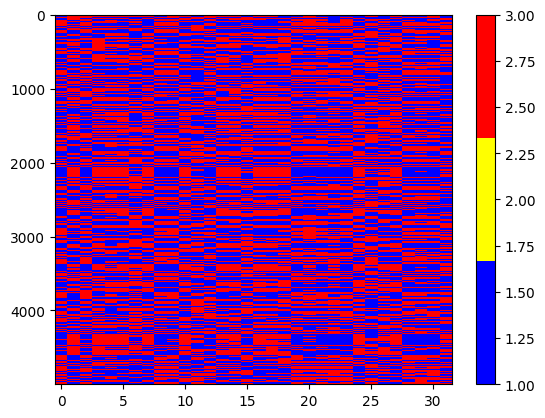

In [13]:


#process_vectors('activations_fc_input_d64_h1_epoch_0_test.txt', 'corrects_list_d64_h1_epoch_0_test.txt', range(1,32))
process_vectors('activations_fc_input_d64_h1_epoch_0_test.txt', 'corrects_list_d64_h1_epoch_0_test.txt', None)

